<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.574135,33.248075,36.454734,0.011186,136.288129,136.276774,0.011355
1,0.0,1.0,56.882896,58.250262,32.120181,-0.000123,157.253216,157.253376,-0.000160
2,0.0,2.0,63.234630,47.838898,23.219116,0.005868,144.298512,144.292582,0.005930
3,0.0,3.0,78.252207,22.790373,94.858892,0.008605,205.910077,205.901220,0.008857
4,0.0,4.0,79.398338,96.895282,21.876907,-0.000837,208.169690,208.170856,-0.001166
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,79.141577,77.984197,83.395339,0.000731,250.521844,250.521506,0.000339
249996,999.0,246.0,50.303192,63.134365,78.135322,-0.000279,201.572599,201.573332,-0.000733
249997,999.0,247.0,43.056183,93.940172,47.191835,-0.000451,194.187739,194.188053,-0.000314
249998,999.0,248.0,77.551337,43.317717,87.840349,0.001534,218.710937,218.710387,0.000550


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    56.574135  33.248075  36.454734  0.011186  136.288129   
      1.0    56.882896  58.250262  32.120181 -0.000123  157.253216   
      2.0    63.234630  47.838898  23.219116  0.005868  144.298512   
      3.0    78.252207  22.790373  94.858892  0.008605  205.910077   
      4.0    79.398338  96.895282  21.876907 -0.000837  208.169690   
...                ...        ...        ...       ...         ...   
999.0 245.0  79.141577  77.984197  83.395339  0.000731  250.521844   
      246.0  50.303192  63.134365  78.135322 -0.000279  201.572599   
      247.0  43.056183  93.940172  47.191835 -0.000451  194.187739   
      248.0  77.551337  43.317717  87.840349  0.001534  218.710937   
      249.0  42.765589  35.287528  78.038801 -0.000310  166.091608   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    136.276774  0.011355  
      1.0    157.253376 -0.000160  
      2.0    144.292582  0.005930  
      3.0    205.901220  0.008857  
      4.0    208.170856 -0.001166  
...                 ...       ...  
999.0 245.0  250.521506  0.000339  
      246.0  201.573332 -0.000733  
      247.0  194.188053 -0.000314  
      248.0  218.710387  0.000550  
      249.0  166.092804 -0.001195  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    56.574135  33.248075  36.454734  0.011186  136.288129   
      1.0    56.882896  58.250262  32.120181 -0.000123  157.253216   
      2.0    63.234630  47.838898  23.219116  0.005868  144.298512   
      3.0    78.252207  22.790373  94.858892  0.008605  205.910077   
      4.0    79.398338  96.895282  21.876907 -0.000837  208.169690   
...                ...        ...        ...       ...         ...   
999.0 245.0  79.141577  77.984197  83.395339  0.000731  250.521844   
      246.0  50.303192  63.134365  78.135322 -0.000279  201.572599   
      247.0  43.056183  93.940172  47.191835 -0.000451  194.187739   
      248.0  77.551337  43.317717  87.840349  0.001534  218.710937   
      249.0  42.765589  35.287528  78.038801 -0.000310  166.091608   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    136.276774  0.011355  
      1.0    157.253376 -0.000160  
      2.0    144.292582  0.005930  
      3.0    205.901220  0.008857  
      4.0    208.170856 -0.001166  
...                 ...       ...  
999.0 245.0  250.521506  0.000339  
      246.0  201.573332 -0.000733  
      247.0  194.188053 -0.000314  
      248.0  218.710387  0.000550  
      249.0  166.092804 -0.001195  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.574135,33.248075,36.454734,0.011186,136.288129,136.276774,0.011355
1,0.0,1.0,56.882896,58.250262,32.120181,-0.000123,157.253216,157.253376,-0.000160
2,0.0,2.0,63.234630,47.838898,23.219116,0.005868,144.298512,144.292582,0.005930
3,0.0,3.0,78.252207,22.790373,94.858892,0.008605,205.910077,205.901220,0.008857
4,0.0,4.0,79.398338,96.895282,21.876907,-0.000837,208.169690,208.170856,-0.001166
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,79.141577,77.984197,83.395339,0.000731,250.521844,250.521506,0.000339
249996,999.0,246.0,50.303192,63.134365,78.135322,-0.000279,201.572599,201.573332,-0.000733
249997,999.0,247.0,43.056183,93.940172,47.191835,-0.000451,194.187739,194.188053,-0.000314
249998,999.0,248.0,77.551337,43.317717,87.840349,0.001534,218.710937,218.710387,0.000550


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    56.574135  33.248075  36.454734  0.011186  136.288129   
      1.0    56.882896  58.250262  32.120181 -0.000123  157.253216   
      2.0    63.234630  47.838898  23.219116  0.005868  144.298512   
      3.0    78.252207  22.790373  94.858892  0.008605  205.910077   
      4.0    79.398338  96.895282  21.876907 -0.000837  208.169690   
...                ...        ...        ...       ...         ...   
999.0 245.0  79.141577  77.984197  83.395339  0.000731  250.521844   
      246.0  50.303192  63.134365  78.135322 -0.000279  201.572599   
      247.0  43.056183  93.940172  47.191835 -0.000451  194.187739   
      248.0  77.551337  43.317717  87.840349  0.001534  218.710937   
      249.0  42.765589  35.287528  78.038801 -0.000310  166.091608   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    136.276774  0.011355  
      1.0    157.253376 -0.000160  
      2.0    144.292582  0.005930  
      3.0    205.901220  0.008857  
      4.0    208.170856 -0.001166  
...                 ...       ...  
999.0 245.0  250.521506  0.000339  
      246.0  201.573332 -0.000733  
      247.0  194.188053 -0.000314  
      248.0  218.710387  0.000550  
      249.0  166.092804 -0.001195  

[250000 rows x 7 columns]

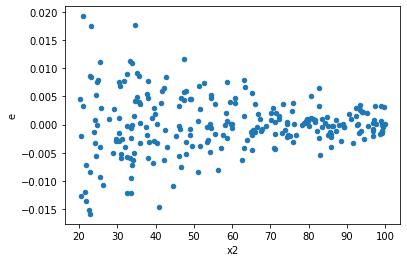

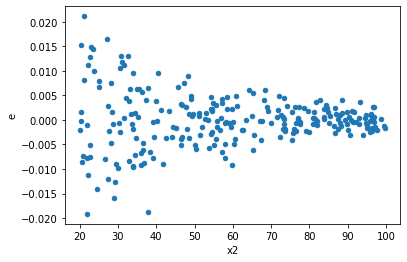

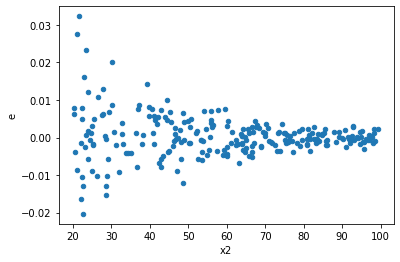

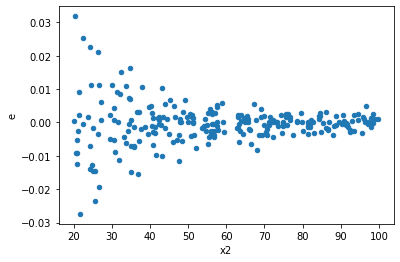

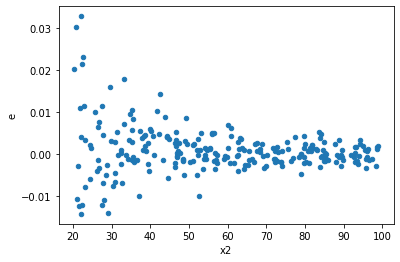

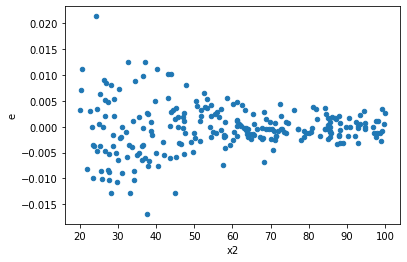

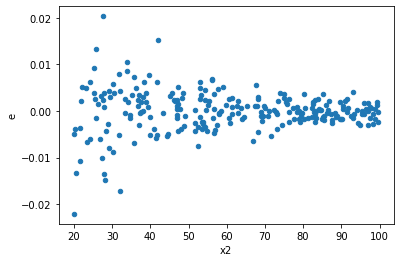

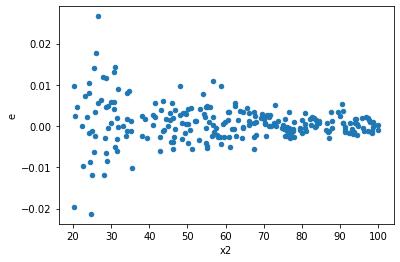

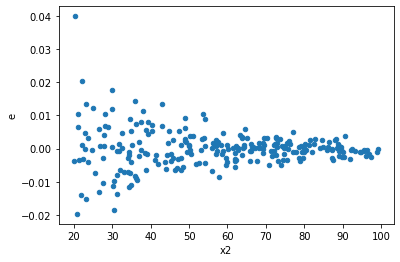

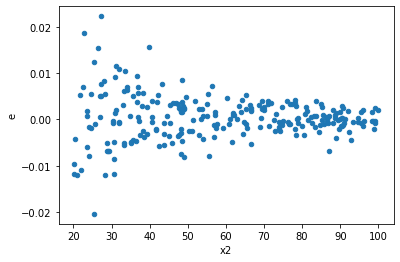

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,119.0,125.0,0.0018038304136968907,0.005710509249178318,1.5158238770562107e-05,4.5684073993426544e-05,3.0138114780291496,2.5069220033202555e-09,0.999999998746539,1.2534610016601277e-09,Reject001=0 : Heteroscedasticity
2.0,106.0,138.0,0.0009395672117862523,0.007241889788873723,8.863841620625022e-06,5.247746223821538e-05,5.920397101422375,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,145.0,99.0,0.0032582418700391803,0.006475701155386667,2.2470633586477107e-05,6.54111227816835e-05,2.9109603220555433,4.416310450672256e-08,0.9999999779184477,2.208155225336128e-08,Reject001=0 : Heteroscedasticity
5.0,111.0,133.0,0.0009261347255585001,0.004362171481086333,8.343556086112614e-06,3.27982818126792e-05,3.9309715754497194,1.4344081478157023e-13,0.9999999999999283,7.172040739078511e-14,Reject001=0 : Heteroscedasticity
6.0,109.0,135.0,0.001076465511909923,0.00379129663686443,9.875830384494708e-06,2.8083678791588373e-05,2.843677716020764,1.1173992398028076e-08,0.9999999944130038,5.586996199014038e-09,Reject001=0 : Heteroscedasticity
7.0,120.0,124.0,0.001657366390208877,0.0039516639850484805,1.3811386585073976e-05,3.186825794393936e-05,2.3073901919724356,5.2615765908647916e-06,0.9999973692117046,2.6307882954323958e-06,Reject001=0 : Heteroscedasticity
8.0,131.0,113.0,0.0013500629226941752,0.006978223775974328,1.0305823837360116e-05,6.175419270773741e-05,5.99216459375809,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
11.0,118.0,126.0,0.001309785065712438,0.002999231718904213,1.1099873438241001e-05,2.3803426340509624e-05,2.144477274714022,3.0202855377137183e-05,0.9999848985723114,1.5101427688568592e-05,Reject001=0 : Heteroscedasticity
15.0,137.0,107.0,0.0028170403583782106,0.0049219216327289735,2.0562338382322705e-05,4.5999267595597886e-05,2.237064031352734,1.938779031207538e-05,0.999990306104844,9.69389515603769e-06,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,105.0,139.0,0.004396437818283647,0.002231258838032216,4.187083636460616e-05,1.6052221856346877e-05,0.38337476033595497,5.062418941863023e-07,Reject001=0 : Heteroscedasticity
1.0,119.0,125.0,0.0018038304136968907,0.005710509249178318,1.5158238770562107e-05,4.5684073993426544e-05,3.0138114780291496,2.5069220033202555e-09,Reject001=0 : Heteroscedasticity
2.0,106.0,138.0,0.0009395672117862523,0.007241889788873723,8.863841620625022e-06,5.247746223821538e-05,5.920397101422375,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,145.0,99.0,0.0032582418700391803,0.006475701155386667,2.2470633586477107e-05,6.54111227816835e-05,2.9109603220555433,4.416310450672256e-08,Reject001=0 : Heteroscedasticity
4.0,127.0,117.0,0.005670307109509515,0.0019869931315965542,4.464808747645287e-05,1.698284727860303e-05,0.3803712149497933,1.4395765978808473e-07,Reject001=0 : Heteroscedasticity
5.0,111.0,133.0,0.0009261347255585001,0.004362171481086333,8.343556086112614e-06,3.27982818126792e-05,3.9309715754497194,1.4344081478157023e-13,Reject001=0 : Heteroscedasticity
6.0,109.0,135.0,0.001076465511909923,0.00379129663686443,9.875830384494708e-06,2.8083678791588373e-05,2.843677716020764,1.1173992398028076e-08,Reject001=0 : Heteroscedasticity
7.0,120.0,124.0,0.001657366390208877,0.0039516639850484805,1.3811386585073976e-05,3.186825794393936e-05,2.3073901919724356,5.2615765908647916e-06,Reject001=0 : Heteroscedasticity
8.0,131.0,113.0,0.0013500629226941752,0.006978223775974328,1.0305823837360116e-05,6.175419270773741e-05,5.99216459375809,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    969
Reject001=1 : Homoscedasticity       31
Name: Result_test, dtype: int64